# Explore steps for ML Template

## Libraries Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%run env.py

In [3]:
%matplotlib inline

## Load Environment

In [4]:
INPUT_DATA_PATH
QUANTILE_LIST

'/Users/prb000j/OneDrive - Walmart Inc/Python Learn Projects/Python Projects/ML_Templates/input_data/'

[0.0, 0.01, 0.03, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.97, 0.99, 1.0]

## Read data

In [5]:
data_raw = pd.read_csv(INPUT_DATA_PATH + 'train.csv', index_col='Id')
data_raw.shape
data_raw.head(3)

(1460, 80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
data_raw.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Basic EDA

### EDA of target data

In [7]:
target_feature = 'SalePrice'
data_raw[target_feature].describe().to_frame().T
data_raw[target_feature].quantile(QUANTILE_LIST).to_frame().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


,0.00,0.01,0.03,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.97,0.99,1.00
SalePrice,34900.0,61815.97,82000.0,88000.0,106475.0,129975.0,163000.0,214000.0,278000.0,326100.0,374230.0,442567.01,755000.0


In [8]:
type(data_raw[target_feature])

pandas.core.series.Series

In [9]:
data_raw[target_feature].isna().sum()

0

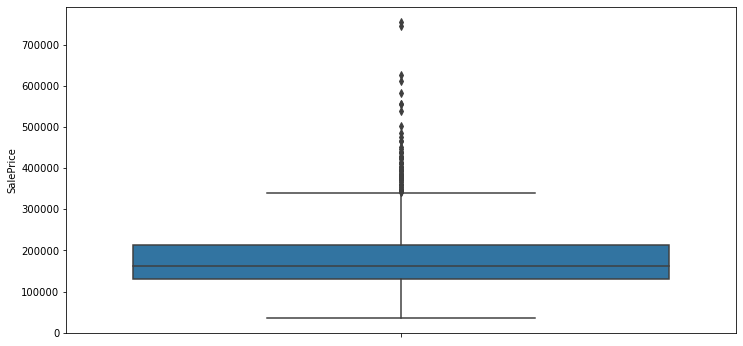

In [10]:
plt.figure(figsize = (12,6))

sns.boxplot(y = target_feature, data = data_raw)

plt.show();

### EDA of features

In [14]:
catg_features = data_raw.select_dtypes(include='object').columns.to_list()
numeric_features = data_raw.select_dtypes(exclude='object').columns.to_list()
len(catg_features)
len(numeric_features)
data_raw[catg_features].head(3)
data_raw[numeric_features].head(3)

43

37

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [271]:
def getColsWithManyNAs(df, na_allowed=0.5):
    '''
    cols that have more than the allowed pct of rows 
    will get returned
    '''
    thresh_na_count = int(na_allowed * df.shape[0])
    op_str = f"NA count is at least {thresh_na_count} rows out of {df.shape[0]} | {thresh_na_count/ df.shape[0]:.2%}"
    print(op_str)
    cols_w_manyNAs = df.isna().sum()[df.isna().sum() > thresh_na_count].index.to_list()
    return cols_w_manyNAs

In [272]:
cols_w_manyNAs = getColsWithManyNAs(data_raw)
cols_w_manyNAs

NA count is at least 730 rows out of 1460 | 50.00%


['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [47]:
data_raw[cols_w_manyNAs].isna().sum()

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [48]:
{col: data_raw[col].value_counts() for col in cols_w_manyNAs}

{'Alley': Grvl    50
 Pave    41
 Name: Alley, dtype: int64,
 'PoolQC': Gd    3
 Ex    2
 Fa    2
 Name: PoolQC, dtype: int64,
 'Fence': MnPrv    157
 GdPrv     59
 GdWo      54
 MnWw      11
 Name: Fence, dtype: int64,
 'MiscFeature': Shed    49
 Gar2     2
 Othr     2
 TenC     1
 Name: MiscFeature, dtype: int64}

In [49]:
{col: data_raw[col].unique() for col in catg_features if data_raw[col].nunique() < 20}

{'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'Alley': array([nan, 'Grvl', 'Pave'], dtype=object),
 'LotShape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 'LandContour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object),
 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object),
 'LotConfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'], dtype=object),
 'Condition2': array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
       dtype=object),
 'BldgType': array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object),
 'HouseStyle': array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
        '2.5Fin'], dtype=object),
 'RoofStyle': array(['Gable', 'Hip', 'Gambrel', 'Mansard'

In [50]:
## some features resemble a numeric column; however, we need to treat them as a categorical
{col: data_raw[col].nunique() for col in numeric_features if data_raw[col].nunique()<50}
pseudo_catg_features = [col for col in numeric_features if data_raw[col].nunique()<50]
len(pseudo_catg_features)

{'MSSubClass': 15,
 'OverallQual': 10,
 'OverallCond': 9,
 'LowQualFinSF': 24,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'TotRmsAbvGrd': 12,
 'Fireplaces': 4,
 'GarageCars': 5,
 '3SsnPorch': 20,
 'PoolArea': 8,
 'MiscVal': 21,
 'MoSold': 12,
 'YrSold': 5}

18

### Bi variate analysis

In [189]:
def getRowColCountForChart(nbr, def_cols=4):
    '''
    get row and column count for subplots
    based on the number of columns in df
    '''
    MAX_COL = 6
    nrow = 1
    if def_cols > MAX_COL:
        print(f"Defaulted to showing {MAX_COL} in one row")
        def_cols = MAX_COL
    if nbr > (def_cols**2):
        print(f"First {def_cols**2} cols selected")
        nbr = def_cols**2
        return def_cols, def_cols
    else:
        ncol = def_cols
        for i in range(1, nbr):
            if i%def_cols == 0:
                nrow += 1
                    
    return nrow, ncol

In [357]:
def plotCatgPlot(df, target_feature, cols, plot_type=sns.boxplot, def_cols=4):
    '''
    get the plot for each of the catg 
    within the columns
    '''
    nrow, ncol = getRowColCountForChart(len(cols), def_cols)
    fig, ax = plt.subplots(nrow, ncol, figsize=(24,12), sharey=True)

    if nrow<2:
        for i, col in enumerate(cols):
            plot_type(x=col, y=target_feature, data=df, ax=ax[i])

        plt.show();
    
    else:
        cnt=0
        for i in range(0, nrow):
            for j in range(0, ncol):  
                col = cols[cnt]
                sns.barplot(x=col, y=target_feature, data=df, ax=ax[i, j])
                cnt += 1
        plt.show();

#### Deviation in target explained by Cols

In [358]:
len(cols_w_manyNAs)

4

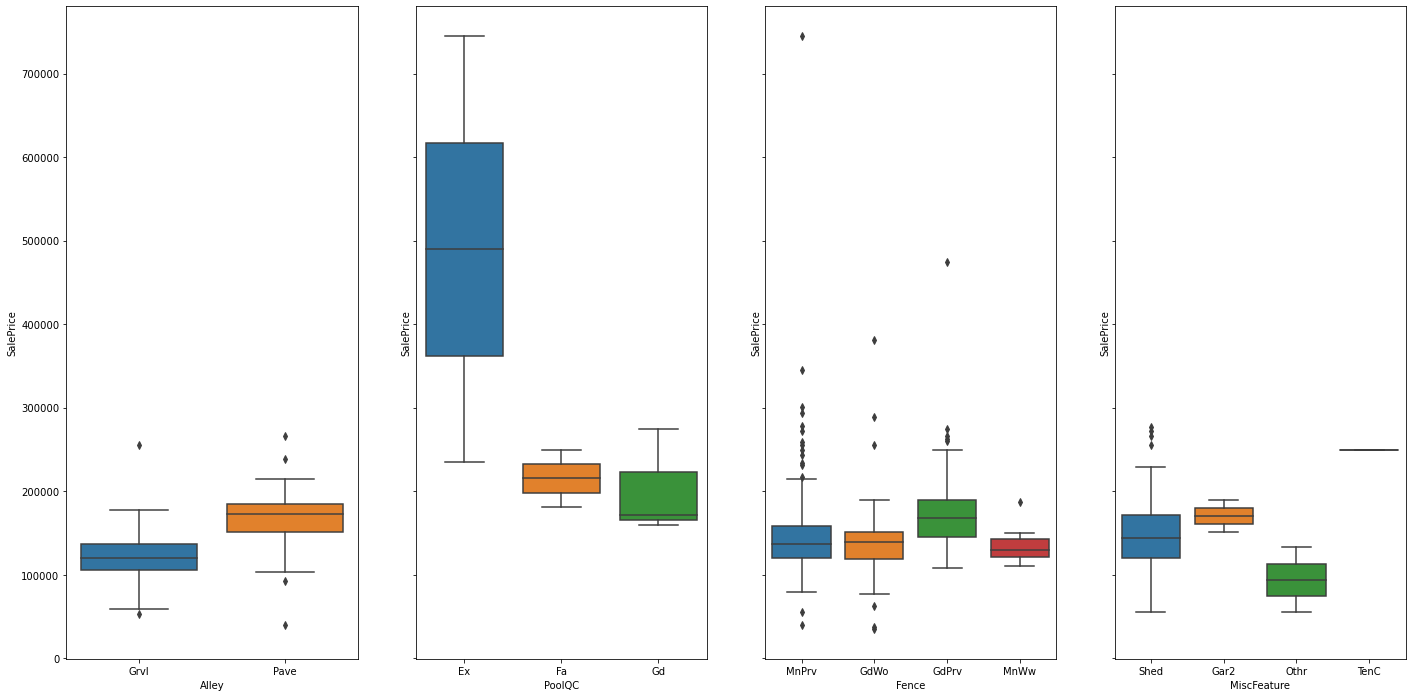

In [359]:
plotCatgPlot(data_raw, target_feature, cols_w_manyNAs)

In [360]:
len(pseudo_catg_features)

18

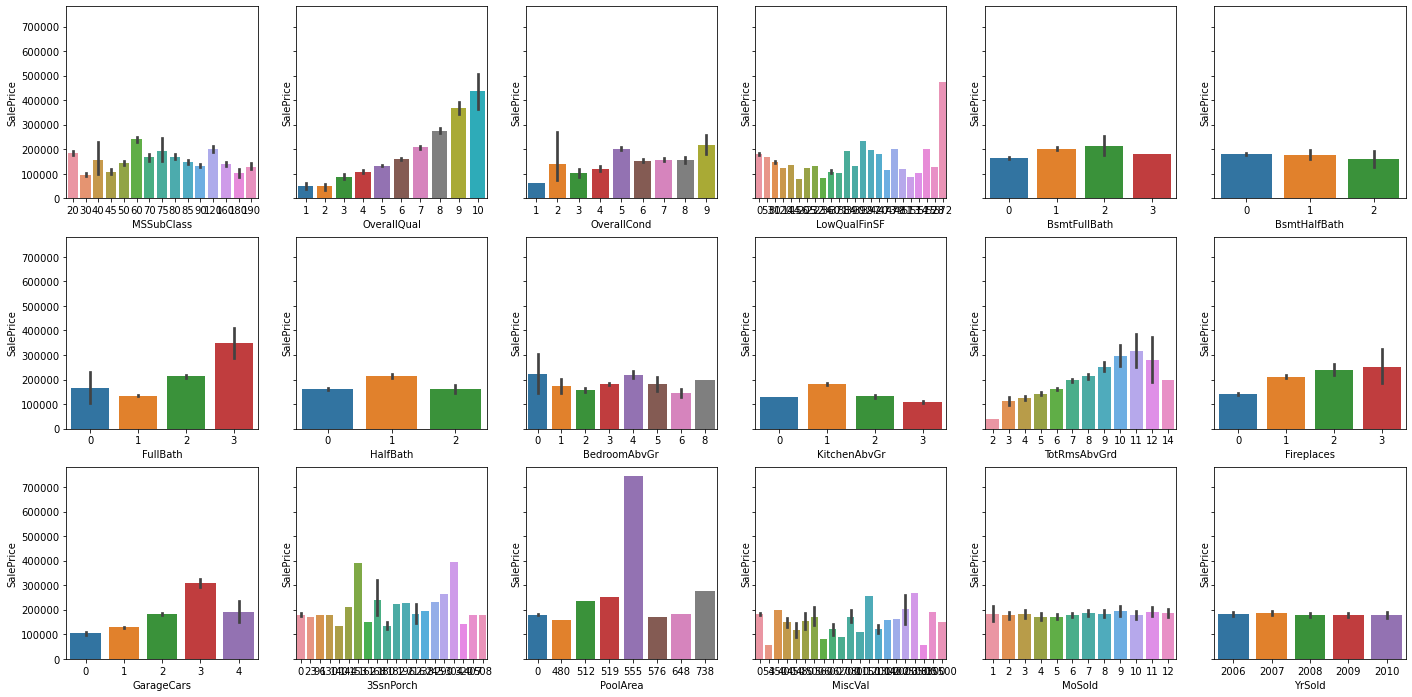

In [361]:
plotCatgPlot(data_raw, target_feature, pseudo_catg_features, sns.barplot, def_cols=6)

In [363]:
len(catg_features)

43

First 36 cols selected


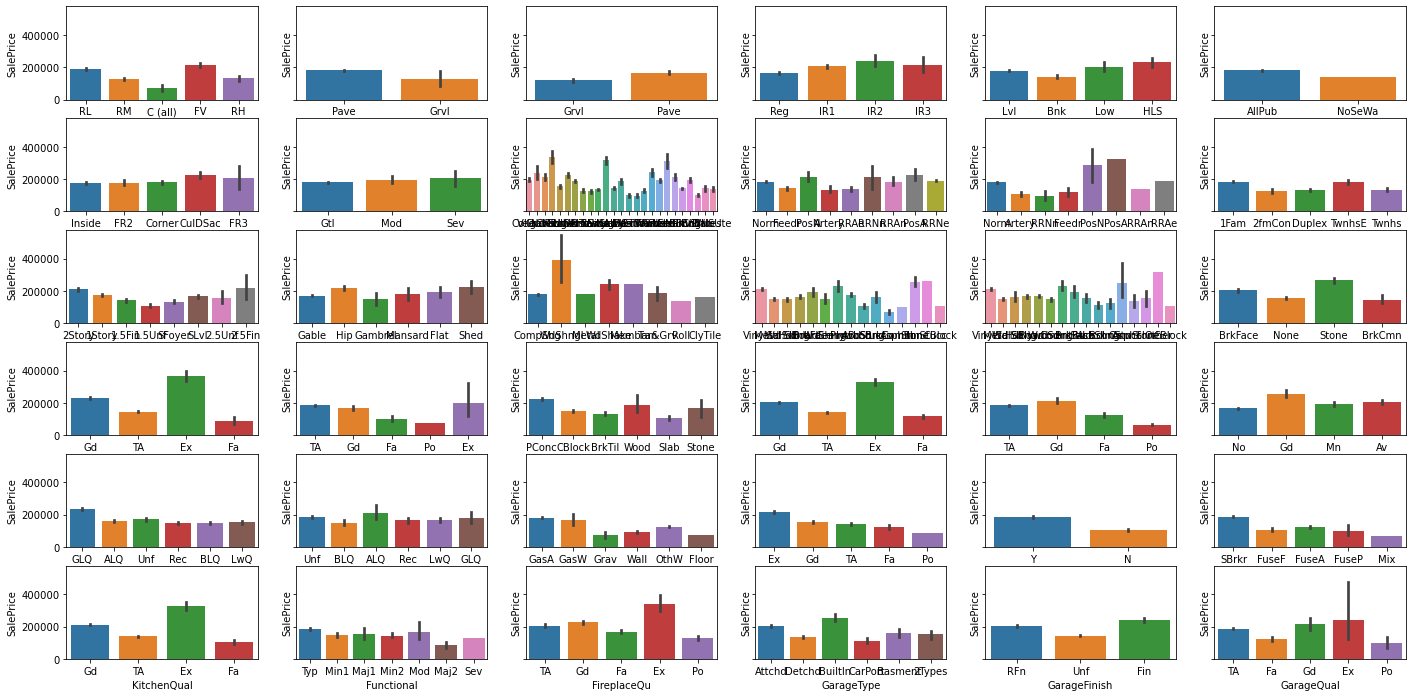

In [364]:
plotCatgPlot(data_raw, target_feature, catg_features, sns.barplot, def_cols=6)

In [328]:
def explainedDeviationByCols(df, cols):
    '''
    rank the cols based on the 
    deviation in target feature they explain
    '''
    THRESH = 0.1
    dev=[]
    for i, col in enumerate(cols):
        df = df[~df[col].isna()]
        temp_gr_df = df.groupby([col], as_index=False)[target_feature].median()
        dev.insert(i, temp_gr_df[target_feature].std())

    metrics_df = pd.DataFrame({
        'features': cols,
        'dev': dev
    })

    metrics_df.shape
    metrics_df.sort_values(['dev'], ascending=False, inplace=True)
    metrics_df.reset_index(drop=True, inplace=True)
    max_dev = metrics_df['dev'].quantile(0.95)
    thresh_l = THRESH * max_dev
    cols_w_low_dev = metrics_df[metrics_df['dev'] < thresh_l]['features'].to_list()
    
    return metrics_df, cols_w_low_dev

In [329]:
_, cols_w_low_dev1 = explainedDeviationByCols(data_raw, pseudo_catg_features)
cols_w_low_dev1

['MoSold', 'YrSold', 'BsmtHalfBath']

In [330]:
_, cols_w_low_dev2 = explainedDeviationByCols(data_raw, catg_features)
cols_w_low_dev2

['LandContour', 'GarageQual']

In [331]:
_, cols_w_low_dev3 = explainedDeviationByCols(data_raw, cols_w_manyNAs)
cols_w_low_dev3

[]

In [332]:
cols_w_low_dev = cols_w_low_dev1 + cols_w_low_dev2
cols_w_low_dev = cols_w_low_dev + cols_w_low_dev3
cols_w_low_dev

['MoSold', 'YrSold', 'BsmtHalfBath', 'LandContour', 'GarageQual']

#### Multi collinearity between features

In [288]:
target_feature

'SalePrice'

In [289]:
len(numeric_features)
numeric_features_upd = list(set(numeric_features).difference(set(pseudo_catg_features + [target_feature])))
len(numeric_features_upd)

37

18

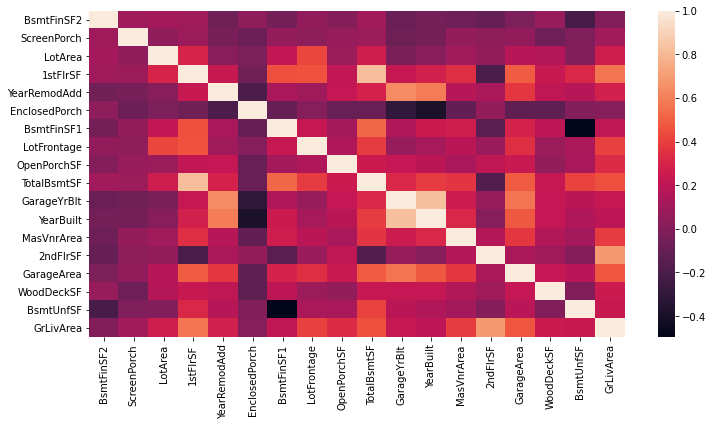

In [290]:
plt.figure(figsize=(12,6))

sns.heatmap(data_raw[numeric_features_upd].corr())

plt.show();

In [319]:
def getRankedCorr(df, cols, corr_thresh=0.7):
    '''
    get ranked correlation between 
    each pair of feature
    '''
    pair_key = []
    corr_val = []
    cnt=0
    for i, col_i in enumerate(cols):
        for j, col_j in enumerate(cols):
            if i == j:
                continue
            temp_pair = col_i + '__' + col_j
            temp_pair_rev = col_j + '__' + col_i
            if len([f for f in pair_key if temp_pair_rev==f])>0:  # avoid repeats
                continue
            pair_key.insert(cnt, temp_pair)
            corr_val.insert(cnt, df[col_i].corr(df[col_j]))
            cnt += 1

    corr_df = pd.DataFrame({
        'feature_pair': pair_key,
        'corr_val': corr_val
    })

    corr_df['abs_corr_val'] = abs(corr_df['corr_val'])
    corr_df.sort_values(['abs_corr_val'], ascending=False, inplace=True)
    h_corr_pair = corr_df[corr_df['abs_corr_val'] > corr_thresh]['feature_pair'].to_list()
    corr_df.drop(['abs_corr_val'], axis=1, inplace=True)
    corr_df.reset_index(drop=True, inplace=True)
    
    return corr_df, h_corr_pair

In [322]:
corr_df, h_corr_pair = getRankedCorr(data_raw, numeric_features_upd, 0.7)
corr_df.shape
len(h_corr_pair)
corr_df.head(10)
h_corr_pair

(153, 2)

2

,feature_pair,corr_val
0,GarageYrBlt__YearBuilt,0.825667
1,1stFlrSF__TotalBsmtSF,0.819530
2,2ndFlrSF__GrLivArea,0.687501
3,YearRemodAdd__GarageYrBlt,0.642277
4,YearRemodAdd__YearBuilt,0.592855
5,1stFlrSF__GrLivArea,0.566024
6,GarageYrBlt__GarageArea,0.564567
7,BsmtFinSF1__TotalBsmtSF,0.522396
8,BsmtFinSF1__BsmtUnfSF,-0.495251
9,1stFlrSF__GarageArea,0.489782


['GarageYrBlt__YearBuilt', '1stFlrSF__TotalBsmtSF']

In [393]:
def getMultiCollFeatr(df, corr_featr_pair_list):
    '''
    input highly correlated features
    return features that need to be dropped 
    based on how are these features correlated 
    with target feature.
    '''
    h_corr_pair_dict = {i:x.split("__") for i, x in enumerate(corr_featr_pair_list)}
    multi_coll_featr = []

    for k, v in h_corr_pair_dict.items():
        temp_dict = {v_one: df[target_feature].corr(df[v_one]) for v_one in v}
        print(temp_dict)
        multi_coll_featr.insert(len(multi_coll_featr), [k1 for k1 in temp_dict.keys() if temp_dict[k1]!=max(temp_dict.values())][0])

    return multi_coll_featr

In [394]:
multi_coll_featr = getMultiCollFeatr(data_raw, h_corr_pair)
multi_coll_featr

{'GarageYrBlt': 0.4863616774878608, 'YearBuilt': 0.5228973328794969}
{'1stFlrSF': 0.6058521846919147, 'TotalBsmtSF': 0.6135805515591956}


['GarageYrBlt', '1stFlrSF']

## Round 1 - feature selection

In [395]:
cols_to_drop = cols_w_manyNAs + cols_w_low_dev
len(cols_to_drop)

9

In [396]:
## update catg & numeric features
catg_features_upd = list(set(catg_features).difference(set(cols_to_drop)))
numeric_features_upd = list(set(numeric_features_upd).difference(set(cols_to_drop + multi_coll_featr)))

len(catg_features_upd)
len(numeric_features_upd)

37

16

## Split data into train & test

## Separating Catg & Numeric features

## Preprocessing data - Numeric features

### Handling missing data 

### Handling outliers in data

## Preprocessing data - Catg features

### Handling missing data 

### Handling outliers in data

### Encoding Catg features

#### Form of labeling / One hot encoding

#### Target encoding

## Feature reduction 
t-SNE or PCA or embeddings

## Initialize set of models

### Model training

### Test prediction & model evaluation

### Voting or Ensemble

## Saving pipeline / model

## Using an existing pre-trained model

### Load pipeline/ model

### Load new data

### Use pipeline to pre-process new data

### Predict using pre-processed new data

## Feedback mechanism 
For continuous improvement

# End of analysis